<a href="https://colab.research.google.com/github/mitmul/medical-ai-course-materials/blob/master/notebooks/Chainer_Basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

変更テスト

# Chainer入門

## Chainerとは？

![](https://github.com/mitmul/medical-ai-course-materials/blob/master/notebooks/images/3-4/img01.png?raw=1)

[Chainer](https://chainer.org/)は、日本企業の[Preferred Networks社](https://www.preferred-networks.jp/ja/)が開発を進めています。
ディープラーニング（ニューラルネットワーク）に特化した、Pythonで使用できるフレームワークです。

Chainerの魅力は次の２点。

- 習得が簡単なインターフェースで作られている
- ディープラーニングの開発を論文レベルにカスタマイズする際とても柔軟に対応できる

Chainerの大きな特徴である**Define by Run**と呼ばれる仕組みが、GoogleのTensorFlowなど他のフレームワークとの大きな違いです。
初心者にとって**学習途中に数値やサイズの確認が出来る**という**デバックの容易さ**がメリットです。

Chainerでわからないことがあれば、Slackで質問できます。
PFNの開発者へ直接質問できるSlackがあり、[こちらのChainer Slack受付フォーム](https://docs.google.com/forms/d/e/1FAIpQLSfqL9XjnqZUIwLOz4K9Oxm8-Ce246IRP51-vZa7HOrofJT9rA/viewform)からメールアドレスを登録して、Slackに招待してもらいましょう。

## Chainerの基礎

### Chainerの読み込み

Chainerの読み込みは、Pythonの他のモジュールと全く同じです。

In [0]:
import chainer

使用しているChainerのバージョンも確認しておきましょう。

In [0]:
chainer.__version__

'5.0.0'

2018年11月時点で最新版がChainerのバージョンが5系となっています。

### リンクの定義

数学においてもプログラミングにおいても、全結合層（fully-connected layer）では、2層で1セットとして扱います。
まずは、３ノードの入力層と２ノードの出力層の部分を表現していきましょう。

![](https://github.com/mitmul/medical-ai-course-materials/blob/master/notebooks/images/3-4/img02.png?raw=1)

In [0]:
import chainer.links as L

3 → 2 のリンクを`fc`（fully-connected layerの略）として、以下のように宣言します。

In [0]:
fc = L.Linear(3, 2)

これだけで完了です。
`L.Linear`は、みなさんが勉強された重回帰分析の**線形結合**という意味です。

宣言したリンクの**重み（W）**と**バイアス（b）**はランダムに初期化されています。

In [0]:
fc.W

variable W([[-1.4219915 ,  0.40851608,  0.13933963],
            [-0.11678611,  0.13321629,  1.0833248 ]])

In [0]:
fc.b

variable b([0., 0.])

このパラメータを最適化の初期値に使用します。

### 乱数のシードを固定して再現性を確保

ここで１つ問題があります。
重みやバイアスのパラメータの値がランダムに初期化されるため、実行する毎に結果が異なってしまうことです。
これでは、今日と明日でも結果が異なり、チーム間でも結果が異なってしまいます。

そこで、**乱数のシードを固定**するという方法を使います。
これにより**再現性の確保**ができます。

実際に、乱数のシードを固定してみましょう。

In [0]:
import numpy as np

In [0]:
np.random.seed(3)

Chainerは**Numpy**と呼ばれる数値計算用のライブラリをベースに作られているため、Numpy上で乱数のシードを固定することにより、**再現性の確保**を実現できます。

※GPUを使用する場合は、Numpyではなく**Cupy**をベースに計算しているため、Cupyで乱数のシードを固定する必要があります。

乱数のシードを固定した後で重みを確認してみましょう。

In [0]:
fc.W

variable W([[-1.4219915 ,  0.40851608,  0.13933963],
            [-0.11678611,  0.13321629,  1.0833248 ]])

In [0]:
fc.b

variable b([0., 0.])

この値と同じになっていれば、乱数のシードがうまく固定できていることがわかります。

### 線形変換の値を計算しよう

手計算で練習した、uの値を計算してみましょう。
uの値は`chainer.links.Linear`の中に準備されているため、以下のようにNumpyの形式で渡すことで計算が完了します。

In [0]:
x = np.array([[1, 2, 3]])

In [0]:
u = fc(x)

InvalidType: 
Invalid operation is performed in: LinearFunction (Forward)

Expect: x.dtype.kind == f
Actual: i != f

本来であれば、このように計算できます。
これは`chainer.links.Linear`というクラスの`call`関数を呼び出しているわけです。
これで計算ができることを、今は覚えておいてください。

しかし、多くの方はこれでエラーが起きます。
エラーの原因は一番下に書いてあるため、まずは原因の確認を行いましょう。

Chainerが初めての方には、非常にわかりにくく、一番最初に悩むエラーです。
これは「int型（i）ではなく、float型（f）で宣言しないといけない」という内容を示しています。

そこで、入力するデータをfloat型で宣言して使用しましょう。

In [0]:
x = np.array([[1,2,3]])

In [0]:
x.dtype

dtype('int32')

Numpyでのデータ型は `.dtype` で確認を行うことができます。
初期状態だと整数を扱うint型の32bitで定義されていることがわかります。

こちらをfloat型で定義しなおしましょう。

In [0]:
x = np.array([[1,2,3]], dtype=np.float)

In [0]:
x.dtype

dtype('float64')

それでは計算しなおしてみましょう。

In [0]:
u = fc(x)

InvalidType: 
Invalid operation is performed in: LinearFunction (Forward)

Expect: b.dtype == x.dtype
Actual: float32 != float64

しかし、float型に変換しても、またエラーが起きてしまいました。
今度のエラーの内容としては、`float64`ではなく、`float32`が望まれると記載されています。

Chainerではデフォルトで32bitを扱うことになっているため、覚えておきましょう。

In [0]:
x = np.array([[1, 2, 3]], dtype=np.float32)

In [0]:
x.dtype

dtype('float32')

また、Chainerのサンプルコードにも出てくるのですが、以下のように省略形で記述することができます。

In [0]:
x = np.array([[1, 2, 3]], 'f')

In [0]:
x.dtype

dtype('float32')

これで線形変換を計算してみましょう。

In [0]:
u = fc(x)

In [0]:
u

variable([[-0.18694043,  3.3996208 ]])

### 非線形変換の計算

先ほど勉強した活性化関数として、**Relu関数**をかける場合は以下のように記述します。
chainerで使用する関数は全てfunctionsにあります

In [0]:
import chainer.functions as F

In [0]:
z = F.relu(u)

In [0]:
z

variable([[0.       , 3.3996208]])

このように、正の値はそのままで負の値は0となるRelu関数が、正しく適用できていることがわかります。

### 実践課題

#### 問題設定

先の知見を活かし、手書きのノートで紹介した「3 → 2 → 1」のニューラルネットワークにおいて、入力`[1, 2, 3]`に対する出力`y`の値を計算してください。

以下の構成で計算してみましょう。

*   左側のリンク：fc1 → (3, 2)
*   右側のリンク：fc2 → (2, 1)
*   fc1の線形変換 → u1
*   fc1の非線形変換（Relu）→ z1
*   fc2の線形変換 → 出力y

なお、計算する前に**シードの固定**（`np.random.seed(3)`）を忘れないようにしてください。

#### 解答

In [0]:
#シードの固定
np.random.seed(3)

In [0]:
# リンクの宣言
fc1 = L.Linear(3, 2)
fc2 = L.Linear(2, 1)

In [0]:
# 入力変数
x = np.array([[1, 2, 3]], 'f')

In [0]:
u1 = fc1(x)
u1

variable([[ 1.7038419, -2.010649 ]])

In [0]:
z1 = F.relu(u1)
z1

variable([[1.7038419, 0.       ]])

In [0]:
y = fc2(z1)
y

variable([[-0.09968679]])

この値が計算できれば正解です。

### 損失関数（loss function）の値を計算しよう

出力の予測値が計算できたので、損失関数の値も計算してみましょう。
先の入力に対する教師データが`t=3`だとすると、以下のように計算できます。

In [0]:
# 教師データ
t = np.array([[3]], 'f')

In [0]:
# 平均二乗誤差の計算
loss = F.mean_squared_error(t, y)
loss

variable(9.608059)

こちらのように評価関数に関しても、Chainerではchainer.functions（F）の中に定義されているため、特別発展的な内容でない限りはこちらを使用して進めていくと良いでしょう。

### chainer.links（L）とchainer.functions（F）の違い

これまで、Chainerの機能である`L`と`F`が何回か登場しましたが、どのように使い分けているかは以下の通りです。

- chainer.links（L）：調整すべきパラメータを持つ関数
- chainer.functions（F）：調整すべきパラメータを持たない関数

具体的には、`L.Linear`のように内部で重み`W`やバイアス`b`のパラメータを持つ場合はchainer.linksで用意されています。
逆にRelu関数では、$f(u) = \max(0, u)$ のように、内部でパラメータを持たないため、chainer.functionsで用意されています。

## Chainerでクラス分類

### データの読み込み

今回はdataフォルダに格納されている`wine_class.csv`を使用してクラス分類の実装を練習してみましょう。
どのような形式でデータを準備しておくと良いのかといった参考になるため、格納されている生のデータも確認しておきましょう。

今回はCSVファイルで用意されているため、データの取り扱いはPythonのデータ操作で一般的な**Pandas**を使って行いましょう。

In [0]:
import pandas as pd

In [0]:
# データの読み込み（df: data frame）
df = pd.read_csv('data/wine_class.csv')

In [0]:
# データの表示（先頭の３件）
df.head(3)

,Class,Alcohol,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Color intensity,Hue,Proline
0,1,14.23,2.43,15.6,127,2.80,3.06,0.28,5.64,1.04,1065
1,1,13.20,2.14,11.2,100,2.65,2.76,0.26,4.38,1.05,1050
2,1,13.16,2.67,18.6,101,2.80,3.24,0.30,5.68,1.03,1185


### 入力変数と教師データ（出力変数）に切り分ける

機械学習のプログラミングを行う上での最初のお題として、入力変数と教師データ（出力変数）の切り分けがあります。
こちらは、毎回行うため、スムーズに出来るように練習しておくことをおすすめします。

In [0]:
# 教師データ（先頭のClass）
t = df.iloc[:, 0]
 
# 入力変数（1番目から最後まで）
x = df.iloc[:, 1:]

こちらのように、正しく切り分けられているかデータの中身を表示して確認しておきましょう。

In [0]:
# 表示して確認
x.head(3)

,Alcohol,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Color intensity,Hue,Proline
0,14.23,2.43,15.6,127,2.80,3.06,0.28,5.64,1.04,1065
1,13.20,2.14,11.2,100,2.65,2.76,0.26,4.38,1.05,1050
2,13.16,2.67,18.6,101,2.80,3.24,0.30,5.68,1.03,1185


In [0]:
# サイズの確認
x.shape

(178, 10)

`.shape`を使うことで、サンプル数（今回は178）と入力変数の数（今回は10）を確認することができます。

### Chainerで計算できるデータ形式に変換

Chainerで計算を行うために、下記の３点を満たしているか確認を行っておきましょう。
こちらが指定された形式となっていない場合、学習の際にエラーが出てしまいます。

- 入力変数や教師データがNumpyで定義されているか
- 分類の場合、ラベルが0から始まっているか
- 入力変数が float32、教師データが回帰の場合 float32、分類の場合 int32 で定義されているか

#### Numpyに変換

Pandasで読み込んだ場合、Pandasの形式となっています。

In [0]:
type(x)

pandas.core.frame.DataFrame

そのため、こちらをNumpyの形式に変換するのは、`.values`とつければOKです。

In [0]:
type(x.values)

numpy.ndarray

#### 分類で使用するラベルを0から始める

今回準備されている教師データのラベルを確認してみましょう。
`min`と`max`で確認すると良いでしょう。

In [0]:
t.min()

1

In [0]:
t.max()

3

今回はラベルが`1`から始まって`3`で終わっているため、`1, 2, 3`というラベルが割り振られた3クラスの分類であることがわかります。
0から始める必要があるため、`1, 2, 3` → `0, 1, 2` としましょう。

Numpyでは、全体に対する引き算もサポートしているため、`t-1`とすればラベル全体に1が引かれ、`0, 1, 2`となります。

In [0]:
# Numpyにデータ型を変換し、ラベルを0から始める
t = t.values - 1
x = x.values

In [0]:
type(t)

numpy.ndarray

In [0]:
type(x)

numpy.ndarray

#### データ型を変更

ここで、現状のデータ型を確認してみましょう。

In [0]:
x.dtype

dtype('float64')

In [0]:
t.dtype

dtype('int64')

こちらのように、`.dtype`のコマンドで確認することができます。
このように、本来であれば32bitで指定しないといけないところを64bit版のコンピュータであれば、デフォルトが64bitで定義されてしまうため、変更する必要がでてきます。

Numpy側で準備されている`.astype()`を使用して、32bitへと変換しておきましょう。Chainer初心者でほぼ必ず遭遇するエラーですので、気をつけましょう。

In [0]:
# 32bitに変換
x = x.astype('float32')
t = t.astype('int32')

In [0]:
x.dtype

dtype('float32')

In [0]:
t.dtype

dtype('int32')

### Chainerで使用するデータセットの形式

メモリに乗る程度の小規模なデータの場合は、**入力変数と教師データをタプルで１セット**にし、それを**リスト化**しておくことがChainer推奨の形式です。

![](https://github.com/mitmul/medical-ai-course-materials/blob/master/notebooks/images/3-5/img02.png?raw=1)

In [0]:
# Chainerで使用できるデータセットの形式
dataset = list(zip(x, t))

このように、`zip(x, t)`で入力変数と教師データをタプル化した後、それを`list`でリスト化します。
毎回同じ記述のため、このように書くと覚えればOKです。

### 訓練データと検証データを分割しよう

機械学習には欠かせない訓練データと検証データの分割です。
Chainerでは`chainer.datasets.split_dataset_random`にその機能が準備されています。
ランダムでなく、前半の70%を訓練、後半の30%を検証といった分割が良い場合は、`chainer.datasets.split_dataset`を使用することができます。
※ 詳しくは[こちら](https://docs.chainer.org/en/stable/reference/generated/chainer.datasets.split_dataset_random.html#chainer.datasets.split_dataset_random)のリファレンス参照

![](https://github.com/mitmul/medical-ai-course-materials/blob/master/notebooks/images/3-5/img03.png?raw=1)

Prameterには`dataset`（先ほど作成した形式）、`first_size`と指定されています。

`first_size`では訓練データのサイズを指定するのですが、このとき全体の70%を訓練データにしようと決めておくと、記述が簡単かつ汎用性の高いプログラムになります。

全体のサイズを取得する時には`len()`が便利です。

In [0]:
len(dataset)

178

`split_dataset_random`を使用した`train`と`test`の分割は以下のようになります。

In [0]:
# 訓練データのサンプル数
n_train = int(len(dataset) * 0.7)

# 訓練データ(train)と検証データ(test)に分割
train, test = chainer.datasets.split_dataset_random(dataset, n_train, seed=1)

`n_train`を計算する際`int`と付けていますが、サイズは整数値しか受け付けません。小数が出たときは`int`によって小数値の切り捨てを行っています。

`seed=1`は、乱数のシードを1で固定しますという意味で、何度か出てきた**再現性確保**のためです。

出力として得られる`train`と`test`を確認してみましょう。

In [0]:
train

In [0]:
test

こちらのように数値が表示されず、どのような形式であるか迷いますが、`train[0]`のようにリストの要素番号を指定すると数値が表示され、リスト形式で保存されていることがわかります。
このあたりは、なかなかリファレンスがないため、挙動を確認しながら進めていくことが必要です。

In [0]:
train[0]

(array([1.369e+01, 2.540e+00, 2.000e+01, 1.070e+02, 1.830e+00, 5.600e-01,
        5.000e-01, 5.880e+00, 9.600e-01, 6.800e+02], dtype=float32), 2)

In [0]:
len(train)

124

In [0]:
len(test)

54

### ニューラルネットワークのモデルを定義

In [0]:
class NN(chainer.Chain):

    # モデルの構造
    def __init__(self):
        super().__init__()
        with self.init_scope():
            self.fc1 = L.Linear(10, 5)  # 10 → 5
            self.fc2 = L.Linear(5, 3)  # 5 → 3

    # 順伝播
    def __call__(self, x):
        u1 = self.fc1(x)
        z1 = F.relu(u1)
        u2 = self.fc2(z1)
        return u2

こちらのように、`__init__`にパラメータを持つリンクを宣言しておき、`__call__`の中で順伝播の計算を記述します。

これが一番簡単な書き方ですが、さらに上級者向けの書き方にブラッシュアップしていきましょう。
まずは、ノードの数を変更するためにはクラス内部を変更する必要がありますが、ここを変数で置き換えて、インスタンス化のタイミングで自由に変更できるようにしておきましょう。

下記のように変数の初期値も設定しておくと、インスタンス化の際に何も指定しない場合にデフォルトの値が使用され便利です。

In [0]:
class NN(chainer.Chain):

    # モデルの構造
    def __init__(self, n_mid_units=5, n_out=3):
        super().__init__()
        with self.init_scope():
            self.fc1 = L.Linear(10, n_mid_units)  # 変数で置き換え
            self.fc2 = L.Linear(5, n_out)  # 変数で置き換え

    # 順伝播
    def __call__(self, x):
        u1 = self.fc1(x)
        z1 = F.relu(u1)
        u2 = self.fc2(z1)
        return u2

つぎに、`L.Linear`の最初の引数は、`None`と指定することで、入力されるデータから自動的に判断することができるため、手動で入力しなくても良いです。
今回はノードの数を簡単に把握することができるため、その恩恵は少ないのですが、この後登場する画像向けのConvolutional Neural Networkなどでは、この機能が活躍します。

In [0]:
class NN(chainer.Chain):

    # モデルの構造
    def __init__(self, n_mid_units=5, n_out=3):
        super().__init__()
        with self.init_scope():
            self.fc1 = L.Linear(None, n_mid_units)  # 10 → None で自動推定
            self.fc2 = L.Linear(None, n_out)  # 5 → None で自動推定

    # 順伝播
    def __call__(self, x):
        u1 = self.fc1(x)
        z1 = F.relu(u1)
        u2 = self.fc2(z1)
        return u2

さらに、順伝播の計算は層の数がさらに増えてくると、変数名の管理が難しくなってくるため、`h`という変数で受け渡し続けると管理する部分が減ります。

In [0]:
class NN(chainer.Chain):

    # モデルの構造
    def __init__(self, n_mid_units=5, n_out=3):
        super().__init__()
        with self.init_scope():
            self.fc1 = L.Linear(None, n_mid_units)
            self.fc2 = L.Linear(None, n_out)

    # 順伝播
    def __call__(self, x):
        h = self.fc1(x)  # hで置きかえ
        h = F.relu(h)  # hで置きかえ
        h = self.fc2(h)  # hで置きかえ
        return h

モデルの定義が完了したため、インスタンス化しておきましょう。

In [0]:
nn = NN()  # 引数を指定しないため、デフォルトの n_mid_units=5, n_out=3 が使用される

もし、引数にデフォルトの値を使用しない場合は下記のように指定します。

In [0]:
nn = NN(n_mid_units=10, n_out=3)

また、この後に学習を行う際、評価関数やレポーティングの機能などは `L.Classifier` で準備されているため、こちらで宣言したモデルをラップしてあげるだけで学習のための準備が完了します。

In [0]:
model = L.Classifier(nn)

ここで、一点忘れてはいけないこととして、乱数のシードの固定です。
モデルを宣言するタイミングでパラメータの値が初期化されるため、その前にシードを固定しておきましょう。

厳密には一番最初のデータが投入された際に `None` で宣言した部分のノード数などが推定されて具体的なモデルが決定します。
しかし、忘れる前にインスタンス化のタイミングでシードを固定しておくと安全です。

In [0]:
np.random.seed(1)

In [0]:
nn = NN()
model = L.Classifier(nn)

### Optimizerの定義

Optimizerではパラメータの最適化を行うための最適化のアルゴリズムを選択します。
各最適化のアルゴリズムには**ハイパーパラメータ**と呼ばれる定数を設定することもできますが、まだここでは触れず、後ほどしっかりと見ていきましょう。

In [0]:
optimizer = chainer.optimizers.SGD()  # 確率的勾配降下法（SGD）を使用

optimizerを単体で定義するだけでは、先ほど宣言した`model`と結びつかないため、下記のように設定を行います。

In [0]:
optimizer.setup(model)

### Iteratorの定義

**Iterator**では「**バッチサイズ**」を決めることができます。

順伝播で評価関数を計算するとき全てのサンプルを使用するのではなく、**ミニバッチ**と呼ばれるサンプルの一部のデータセットのみで評価関数の計算を行い、逆伝播で勾配情報を計算し、最適化アルゴリズム（SGDやAdam等）によるパラメータの学習を行います。

> **ミニバッチを採用する理由**
>
> 例えば、10万サンプルある場合「10万回順伝播を計算しようやく1回パラメータ更新できる」というような、サンプル数が多いほどパラメータ更新にかかる時間が長くなるという問題を避けられます。
> バッチサイズを10としておけば、ほとんど同じ計算負荷で1万回のパラメータ更新を行うことができます。（厳密には逆伝播が毎回走るため同じ計算負荷ではない）
>
> もう一つの理由として、ミニバッチに分けて最適化を行うことで局所最適解に陥ることを避けられると言われています。

今回は**バッチサイズ**を10と設定しましょう。

In [0]:
batchsize = 10

In [0]:
train_iter = chainer.iterators.SerialIterator(train, batchsize)
test_iter  = chainer.iterators.SerialIterator(test,  batchsize, repeat=False, shuffle=False)

### Updaterの定義

**Updater**では、**Optimizer**の設定や使用するデバイス（CPUやGPU）の設定を行えます。

*   CPUを使用する場合には`device=-1`とオプションに指定しましょう。
*   GPUを使用する場合には`device=0`（GPUを複数枚指している場合は`device=1`なども存在）とオプションで明示しておきましょう。

`device`を指定しない場合は、CPUが使用されます。

In [0]:
from chainer import training

In [0]:
updater = training.StandardUpdater(train_iter, optimizer, device=-1)

### Trainerとextensionsの設定

Trainerでは、**エポック（ミニバッチを全て処理して１エポック）**の回数や、そのextensionsでオプションを指定することにより、**結果をログ出力**や**標準出力**（インタラクティブに表示）できます。

In [0]:
from chainer.training import extensions

In [0]:
# エポックの数
epoch = 50

In [0]:
# trainerの宣言
trainer = training.Trainer(updater, (epoch, 'epoch'), out='result/wine')

# 検証データで評価
trainer.extend(extensions.Evaluator(test_iter, model, device=-1))

# 学習の経過をtrainerのoutで指定したフォルダにlogというファイル名で記録する
trainer.extend(extensions.LogReport(trigger=(1, 'epoch')))

# １エポックごと（trigger）に、trainデータに対するlossと、testデータに対するloss、経過時間（elapsed_time）を標準出力させる
trainer.extend(extensions.PrintReport(['epoch', 'main/accuracy', 'validation/main/accuracy', 'main/loss', 'validation/main/loss', 'elapsed_time']), trigger=(1, 'epoch'))

### 学習の実行

設定が完了すると、下記のコマンドで学習を実行して、その結果をレポーティングしてくれます。

In [0]:
trainer.run()

epoch       main/accuracy  validation/main/accuracy  main/loss   validation/main/loss  elapsed_time
1           0.392308       0.341667                  54.0227     1.09851               0.0838952     
2           0.408333       0.341667                  1.09675     1.09853               0.107586      
3           0.423077       0.341667                  1.095       1.0986                0.132338      
4           0.425          0.341667                  1.09292     1.09875               0.157441      
5           0.416667       0.341667                  1.0927      1.0989                0.180843      
6           0.438462       0.341667                  1.08944     1.09918               0.205588      
7           0.391667       0.341667                  1.09269     1.09935               0.228848      
8           0.438462       0.341667                  1.08715     1.09971               0.253859      
9           0.4            0.341667                  1.09034     1.09996            

### 結果の確認

最後に今回のモデルでの予測結果を確認しておきましょう。
Trainerを使用すると、`result/wine`というフォルダができ、この中に`log`というファイルが自動的に生成されます。
こちらに、学習結果が全て保存されており、後で学習の状況を可視化して確認したりできます。

まずは、logのファイルをPythonで読み込みましょう。

In [0]:
import json

In [0]:
# logファイルから結果の読み込み
with open('result/wine/log') as f:
    logs = json.load(f)
    results = pd.DataFrame(logs)

In [0]:
# 結果の確認
results

,elapsed_time,epoch,iteration,main/accuracy,main/loss,validation/main/accuracy,validation/main/loss
0,0.083895,1,13,0.392308,54.022660,0.341667,1.098510
1,0.107586,2,25,0.408333,1.096746,0.341667,1.098532
2,0.132338,3,38,0.423077,1.095000,0.341667,1.098596
3,0.157441,4,50,0.425000,1.092917,0.341667,1.098753
4,0.180843,5,62,0.416667,1.092705,0.341667,1.098903
5,0.205588,6,75,0.438462,1.089438,0.341667,1.099179
6,0.228848,7,87,0.391667,1.092686,0.341667,1.099351
7,0.253859,8,100,0.438462,1.087147,0.341667,1.099714
8,0.277414,9,112,0.400000,1.090339,0.341667,1.099957
9,0.305134,10,124,0.425000,1.086703,0.341667,1.100286


Pandasの機能を使って、数値だけでなく可視化も行いましょう。
Pandasのプロットでは、Maptlotlibをベースにしており、Jupyter Notebook上でインライン表示ができるように設定しておきましょう。

In [0]:
%matplotlib inline

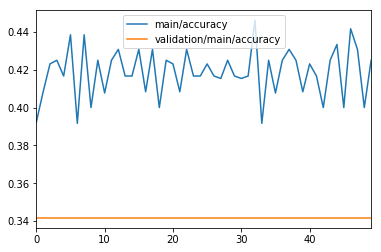

In [0]:
# accuracy（精度）を表示
results[['main/accuracy', 'validation/main/accuracy']].plot()

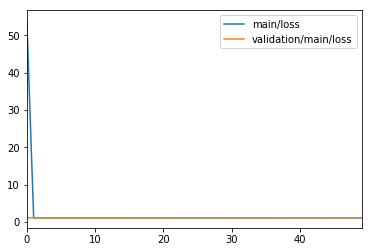

In [0]:
# loss（損失関数）を表示
results[['main/loss', 'validation/main/loss']].plot()

こちらのように、精度が訓練データに対して約40%強、検証データに対して約35%程度にとどまっています。
検証データが運用した際に得られる精度の目安になるため、運用後は良くても35％程度しか正解しないようなモデルであることがわかります。

### 実践のヒント

今回は一通りの流れを説明しましたが、まだまだ精度が良くないと不満に思った方もいるかと思います。
ここからは試行錯誤の世界になるのですが、まずいちばん手っ取り早く精度を上げることが出来る方法として、**BatchNormalization**が挙げられます。

実装としては、各バッチ毎に、平均と標準偏差を定めて正規化を行うといった非常に簡単な手法なのですが、これをかませることによって、各変数感のスケールによる差を吸収できます。

それでは、BatchNormazliationがある場合で試してみましょう。

宣言していたニューラルネットワークのクラスを以下のように変更して、もう一度学習を行ってみましょう。

In [0]:
class NN(chainer.Chain):

    # モデルの構造
    def __init__(self, n_mid_units=5, n_out=3):
        super().__init__()
        with self.init_scope():
            self.fc1 = L.Linear(None, n_mid_units)
            self.fc2 = L.Linear(None, n_out)
            self.bn = L.BatchNormalization(10)  # Batch Normalizationは平均と分散がパラメータ

    # 順伝播
    def __call__(self, x):
        h = self.bn(x)  # Batch Normalizationの処理を追加
        h = self.fc1(h)
        h = F.relu(h)
        h = self.fc2(h)
        return h

In [0]:
# 乱数のシードを固定
np.random.seed(1)

# モデルのインスタンス化
nn = NN()
model = L.Classifier(nn)

# Optimizerの定義
optimizer = chainer.optimizers.SGD()
optimizer.setup(model)  # modelと紐付ける

# Iteratorの定義
batchsize = 10
train_iter = chainer.iterators.SerialIterator(train, batchsize)
test_iter = chainer.iterators.SerialIterator(test, batchsize, repeat=False, shuffle=False)

# Updaterの定義
updater = chainer.training.StandardUpdater(train_iter, optimizer, device=-1)

# trainerとそのextensionsの設定
epoch = 50
trainer = training.Trainer(updater, (epoch, 'epoch'), out='result/wine')
trainer.extend(extensions.Evaluator(test_iter, model, device=-1))
trainer.extend(extensions.LogReport(trigger=(1, 'epoch')))
trainer.extend(extensions.PrintReport(['epoch', 'main/accuracy', 'validation/main/accuracy', 'main/loss', 'validation/main/loss', 'elapsed_time']), trigger=(1, 'epoch'))

In [0]:
# 学習の実行
trainer.run()

epoch       main/accuracy  validation/main/accuracy  main/loss   validation/main/loss  elapsed_time
1           0.415385       0.341667                  1.10392     1.21442               0.0324014     
2           0.575          0.475                     1.0031      0.993539              0.0635639     
3           0.553846       0.608333                  0.942188    0.922005              0.0964929     
4           0.641667       0.625                     0.848846    0.856451              0.126369      
5           0.65           0.625                     0.81297     0.80548               0.159143      
6           0.684615       0.608333                  0.74872     0.771339              0.190904      
7           0.675          0.625                     0.719701    0.728936              0.22096       
8           0.753846       0.625                     0.704584    0.70214               0.255656      
9           0.716667       0.641667                  0.688909    0.673809           

In [0]:
# logファイルから結果の読み込み
with open('result/wine/log') as f:
    logs = json.load(f)
    results = pd.DataFrame(logs)

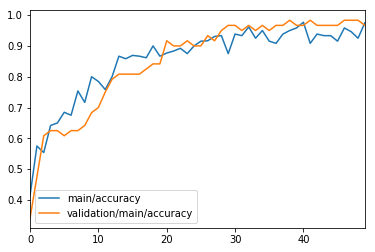

In [0]:
# accuracy（精度）を表示
results[['main/accuracy', 'validation/main/accuracy']].plot()

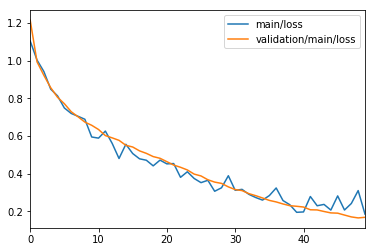

In [0]:
# loss（損失関数）を表示
results[['main/loss', 'validation/main/loss']].plot()

上記のようにAccuracyの値がぐっと良くなっていれば成功です。

このように、ディープラーニングでは、BatchNormalizationを含めた細かなポイントがあったりするため、調べながら進めてみてください。
Chainerでは、ほとんどの機能がすでに実装されているため、上記のコードのように少し付け加えるだけでその効果を検証できるため、非常に便利です。

## 学習済みモデルを保存

学習が終わると、学習済みモデルが得られます。 Trainerのextensionsでsnapshotを取ることも可能ですが、今回は手動で学習済みモデルを保存する方法を紹介します。

chainerで準備されている`serializers`のモジュールを使用すれば保存できます。
保存の際には、モデルの名前と学習済みモデルを指定しましょう。

In [0]:
chainer.serializers.save_npz('models/wine.npz', model)

こちらでmodelsのフォルダ内に `wine.npz` というファイルができていれば学習済みモデルの保存が完了です。

## 学習済みモデルを使用した推論

### 学習済みモデルのロード

学習済みモデルは単にファイルをロードするだけでなく、まずはモデルの構造を明示しておき、そのモデルに対して、パラメータの値を当てはめながらロードしていくことになります。

In [0]:
model = L.Classifier(NN())

In [0]:
chainer.serializers.load_npz('models/wine.npz', model)

### 予測値の計算

今回は一番最初のサンプルに対する予測値を計算してみましょう。

In [0]:
x_new = x[0]

In [0]:
x_new.shape

(10,)

In [0]:
# 予測値の計算
y = model.predictor(x_new)

InvalidType: 
Invalid operation is performed in: BatchNormalization (Forward)

Expect: in_types[0].ndim >= in_types[1].ndim + 1
Actual: 1 < 2

推論で使用する際には、`(バッチサイズ, 入力変数の数)` という形式となっていないとエラーが起きます。
今回であれば、`(1, 10)`が望ましいデータの形といえます。

In [0]:
x_new = x_new[np.newaxis]

In [0]:
x_new.shape

(1, 10)

In [0]:
# 予測値の計算
y = model.predictor(x_new)
y

/usr/local/lib/python3.5/dist-packages/chainer/functions/normalization/batch_normalization.py:67: UserWarning: A batch with no more than one sample has been given to F.batch_normalization. F.batch_normalization will always output a zero tensor for such batches. This could be caused by incorrect configuration in your code (such as running evaluation while chainer.config.train=True), but could also happen in the last batch of training if non-repeating iterator is used.
  UserWarning)


variable([[-0.5496615 ,  0.19866087, -0.40578216]])

In [0]:
y = F.softmax(y)
y

variable([[0.234291  , 0.49516267, 0.27054632]])

In [0]:
y.array

array([[0.234291  , 0.49516267, 0.27054632]], dtype=float32)

In [0]:
np.argmax(y.array)

1

このように学習済みモデルを使用した推論を実行できました。